In [2]:
import numpy as np               # used for multidimensional array
import pandas as pd              # used for import the dataset

#import package for chi-square test
from scipy.stats import chi2_contingency


import matplotlib.pyplot as plt  # used for Visualizing the result

#this will make your plot outputs appear and be stored within the notebook
%matplotlib inline

In [3]:
adult = pd.read_csv("adult.csv")

In [4]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
#adult['attribute name'].fillna(adult['attribute name'].mean(), inplace=True)

In [5]:
#adult['attribute name'].fillna(27, inplace=True)

In [5]:
adult['workclass'].fillna(adult['workclass'].mode()[0], inplace=True)

C:\Users\frank\AppData\Local\Temp\ipykernel_40900\3600181828.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult['workclass'].fillna(adult['workclass'].mode()[0], inplace=True)


In [7]:
adult.isnull().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [8]:
adult['occupation'].fillna('unknown', inplace=True)

C:\Users\frank\AppData\Local\Temp\ipykernel_40900\958883291.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  adult['occupation'].fillna('unknown', inplace=True)


In [10]:
adult.dropna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
adult.dropna(axis = 1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,<=50K


In [12]:
contigency=pd.crosstab(adult['education'], adult['income'])
contigency

income,<=50K,>50K
education,,
10th,871,62
11th,1115,60
12th,400,33
1st-4th,162,6
5th-6th,317,16
7th-8th,606,40
9th,487,27
Assoc-acdm,802,265
Assoc-voc,1021,361


In [14]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
# Print the p-value
print(p)

0.0


The p-value is 0 as output stated. This indicated the two attributes are correlated. 

In [20]:
adult1 = adult[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss']]

pearsoncorr=adult1.corr(method='pearson')
pearsoncorr

,age,fnlwgt,education-num,capital-gain,capital-loss
age,1.000000,-0.076646,0.036527,0.077674,0.057775
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000


<Axes: >

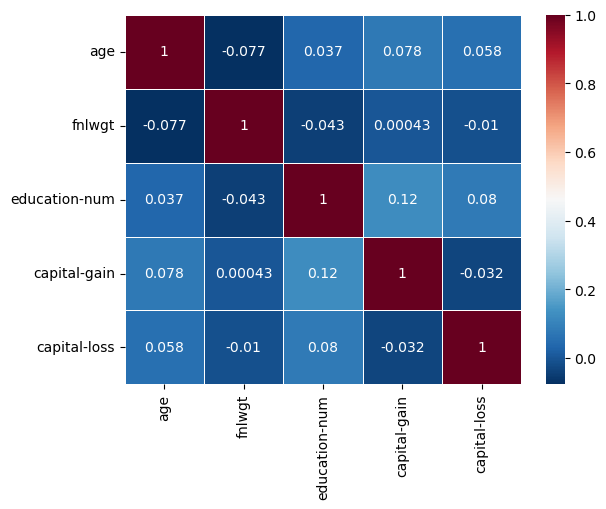

In [19]:
import seaborn as sb
sb.heatmap(pearsoncorr,
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

## More correlations in other variables.
- Workclass , education, occupation , race , sex , income ... 

In [ ]:
adult2 = adult[['workclass', 'education', 'occupation', 'race' , 'sex' , 'income' ]]

pearsoncorr_2=adult2.corr(method='pearson')
pearsoncorr_2
sb.heatmap(pearsoncorr_2,
            xticklabels=pearsoncorr_2.columns,
            yticklabels=pearsoncorr_2.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

ValueError: could not convert string to float: 'State-gov'

In [15]:
del adult['fnlwgt']

In [16]:
adult['workclass'].value_counts()

,count
workclass,
Private,24532
Self-emp-not-inc,2541
Local-gov,2093
State-gov,1298
Self-emp-inc,1116
Federal-gov,960
Without-pay,14
Never-worked,7


In [17]:
adult = adult.replace(['Local-gov', 'State-gov', 'Federal-gov'], 'Government-employee')

In [18]:
adult['workclass'].value_counts()

,count
workclass,
Private,24532
Government-employee,4351
Self-emp-not-inc,2541
Self-emp-inc,1116
Without-pay,14
Never-worked,7


In [19]:
adult['age_1'] = pd.qcut(adult['age'], q=4)

In [20]:
adult['age_1'].value_counts()

,count
age_1,
"(16.999, 28.0]",8898
"(37.0, 48.0]",8241
"(28.0, 37.0]",7783
"(48.0, 90.0]",7639


In [21]:
adult['age_2'] = pd.cut(adult['age'], bins=4)

In [22]:
adult['age_2'].value_counts()

,count
age_2,
"(16.927, 35.25]",14925
"(35.25, 53.5]",12713
"(53.5, 71.75]",4455
"(71.75, 90.0]",468


In [23]:
"""
The most effective way to convert categorical data into numerical form is by using dummy encoding (one-hot encoding).
This method transforms each category into a separate binary feature, preserving the original, unordered nature of the data
and avoiding the introduction of any artificial hierarchy.
However, a key drawback is that it increases the dimensionality of the dataset—more categories mean more features.
This can lead to longer training times and higher computational costs, especially with large datasets.
As a result, in situations where computational resources are limited, we might choose to assign numeric codes to each category instead.
While this approach is more efficient, it introduces an implicit order where none exists, potentially distorting the data's original meaning.
"""

workclass_dummies = pd.get_dummies(adult['workclass'])
workclass_dummies

,Government-employee,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,Without-pay
0,True,False,False,False,False,False
1,False,False,False,False,True,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
32556,False,False,True,False,False,False
32557,False,False,True,False,False,False
32558,False,False,True,False,False,False
32559,False,False,True,False,False,False


In [24]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
adult['workclass'] = LE.fit_transform(adult['workclass'])

In [25]:
adult['workclass'].value_counts()

,count
workclass,
2,24532
0,4351
4,2541
3,1116
5,14
1,7


In [26]:
adult.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_1,age_2
0,39,0,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,"(37.0, 48.0]","(35.25, 53.5]"
1,50,4,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,"(48.0, 90.0]","(35.25, 53.5]"
2,38,2,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,"(37.0, 48.0]","(35.25, 53.5]"
3,53,2,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,"(48.0, 90.0]","(35.25, 53.5]"
4,28,2,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,"(16.999, 28.0]","(16.927, 35.25]"


In [27]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

#for just one numerical variable
adult[['age']]=min_max_scaler.fit_transform(adult[['age']])

#for all numerical variables
adult[['age', 'workclass', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']]=\
min_max_scaler.fit_transform(adult[['age', 'workclass', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

adult.describe()

,age,workclass,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.384835,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.187541,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.400000,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.400000,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.400000,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [28]:
adult_sample=adult.sample(frac=0.5, replace=False, random_state=1)

In [29]:
adult.shape

(32561, 16)

In [30]:
adult_sample.shape

(16280, 16)

In [31]:
adult_sample1=adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.5))

/tmp/ipython-input-1163226287.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  adult_sample1=adult.groupby('income', group_keys=False).apply(lambda x: x.sample(frac=0.5))


In [32]:
adult_sample.shape

(16280, 16)

In [33]:
adult['income'].value_counts()

,count
income,
<=50K,24720
>50K,7841


In [34]:
adult_sample1['income'].value_counts()

,count
income,
<=50K,12360
>50K,3920
